In [96]:
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [97]:
# Create an ExcelFile object
excel_file = pd.ExcelFile('US_Regional_Sales_Data.xls')

In [98]:
# Get the list of sheet names
sheet_names = excel_file.sheet_names

# Print the sheet names
print(sheet_names)

['Sales Orders Sheet', 'Customers Sheet', 'Store Locations Sheet', 'Products Sheet', 'Regions Sheet', 'Sales Team Sheet']


In [99]:
# Read Excel file into a Pandas DataFrame
Sales_df = pd.read_excel('US_Regional_Sales_Data.xls', sheet_name='Sales Orders Sheet')
Customers_df = pd.read_excel('US_Regional_Sales_Data.xls', sheet_name='Customers Sheet')
Stores_df = pd.read_excel('US_Regional_Sales_Data.xls', sheet_name='Store Locations Sheet')
Products_df = pd.read_excel('US_Regional_Sales_Data.xls', sheet_name='Products Sheet')
Regions_df = pd.read_excel('US_Regional_Sales_Data.xls', sheet_name='Regions Sheet')
Team_df = pd.read_excel('US_Regional_Sales_Data.xls', sheet_name='Sales Team Sheet')


In [100]:
Sales_df.columns

Index(['OrderNumber', 'Sales Channel', 'WarehouseCode', 'ProcuredDate',
       'OrderDate', 'ShipDate', 'DeliveryDate', 'CurrencyCode', '_SalesTeamID',
       '_CustomerID', '_StoreID', '_ProductID', 'Order Quantity',
       'Discount Applied', 'Unit Price', 'Unit Cost'],
      dtype='object')

In [101]:
Sales_df.shape

(7991, 16)

In [102]:
Sales_df.sample(10)

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost
6927,SO - 0007028,In-Store,WARE-NMK1003,2020-06-18,2020-08-29,2020-09-11,2020-09-14,USD,6,44,112,14,3,0.200,3993.2,3034.832
4205,SO - 0004306,In-Store,WARE-XYS1001,2019-05-15,2019-10-12,2019-10-28,2019-11-04,USD,5,29,17,40,3,0.075,2499.1,1024.631
1342,SO - 0001443,Distributor,WARE-NMK1003,2018-07-19,2018-11-08,2018-11-27,2018-11-29,USD,23,47,145,33,1,0.050,1058.6,455.198
356,SO - 000457,Wholesale,WARE-PUJ1005,2018-04-10,2018-07-12,2018-07-31,2018-08-04,USD,27,11,273,7,7,0.200,1822.4,1184.560
5823,SO - 0005924,Online,WARE-NMK1003,2019-12-01,2020-04-22,2020-05-05,2020-05-06,USD,13,30,98,14,1,0.075,5179.1,2434.177
316,SO - 000417,Online,WARE-NMK1003,2018-04-10,2018-07-08,2018-07-30,2018-08-05,USD,18,48,148,31,2,0.075,254.6,127.300
6807,SO - 0006908,In-Store,WARE-UHY1004,2020-03-10,2020-08-14,2020-08-30,2020-09-09,USD,9,46,211,45,1,0.100,2485.7,1715.133
5558,SO - 0005659,Distributor,WARE-NMK1003,2019-12-01,2020-03-21,2020-04-06,2020-04-08,USD,23,38,155,30,5,0.400,3142.3,2419.571
5300,SO - 0005401,In-Store,WARE-NMK1003,2019-08-23,2020-02-19,2020-02-27,2020-03-06,USD,2,37,193,28,8,0.050,904.5,633.150
3982,SO - 0004083,In-Store,WARE-NMK1003,2019-05-15,2019-09-14,2019-10-08,2019-10-18,USD,4,29,147,36,2,0.075,1829.1,877.968


In [103]:
Sales_df['Recency'] = max(Sales_df['OrderDate'])-Sales_df['OrderDate']

In [104]:
Sales_df.sample(10)


,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost,Recency
2617,SO - 0002718,In-Store,WARE-PUJ1005,2019-02-04,2019-04-05,2019-04-17,2019-04-19,USD,2,18,271,23,8,0.400,6083.6,5171.060,635 days
6967,SO - 0007068,In-Store,WARE-NBV1002,2020-06-18,2020-09-03,2020-09-05,2020-09-12,USD,2,32,87,45,4,0.400,2331.6,1865.280,118 days
3289,SO - 0003390,In-Store,WARE-MKL1006,2019-02-04,2019-06-20,2019-06-27,2019-07-03,USD,12,14,366,33,1,0.075,1782.2,1372.294,559 days
5194,SO - 0005295,Online,WARE-NBV1002,2019-08-23,2020-02-08,2020-02-25,2020-03-01,USD,15,44,69,1,6,0.150,3477.3,2677.521,326 days
4447,SO - 0004548,Online,WARE-XYS1001,2019-08-23,2019-11-13,2019-11-24,2019-12-03,USD,17,33,12,3,5,0.400,6277.9,4143.414,413 days
3994,SO - 0004095,Online,WARE-UHY1004,2019-05-15,2019-09-15,2019-09-29,2019-10-06,USD,20,49,208,25,2,0.150,4013.3,3210.640,472 days
4095,SO - 0004196,Online,WARE-NMK1003,2019-05-15,2019-09-28,2019-10-03,2019-10-13,USD,17,45,181,28,3,0.050,1011.7,829.594,459 days
6554,SO - 0006655,In-Store,WARE-NMK1003,2020-03-10,2020-07-16,2020-07-19,2020-07-24,USD,3,49,155,4,4,0.100,1145.7,618.678,167 days
7372,SO - 0007473,In-Store,WARE-MKL1006,2020-06-18,2020-10-20,2020-10-30,2020-11-03,USD,7,25,354,17,2,0.050,2599.6,1819.720,71 days
5007,SO - 0005108,In-Store,WARE-NMK1003,2019-12-01,2020-01-15,2020-01-31,2020-02-01,USD,11,18,144,20,1,0.050,5949.6,3272.280,350 days


In [105]:
Sales_df = Sales_df[['_CustomerID', 'Sales Channel','Order Quantity',
       'Discount Applied', 'Unit Price', 'Unit Cost','Recency']]

In [106]:
Sales_df['Recency'] = Sales_df['Recency'].astype('string').str.replace('days', '')
Sales_df['Total Sales'] = Sales_df['Unit Price'] - (Sales_df['Unit Price']*Sales_df['Discount Applied'] - Sales_df['Unit Cost'])


In [107]:
Sales_df.dtypes

_CustomerID                  int64
Sales Channel               object
Order Quantity               int64
Discount Applied           float64
Unit Price                 float64
Unit Cost                  float64
Recency             string[python]
Total Sales                float64
dtype: object

In [108]:
Sales_df["Recency"]=Sales_df['Recency'].astype(int) 
Sales_df.dtypes

_CustomerID           int64
Sales Channel        object
Order Quantity        int64
Discount Applied    float64
Unit Price          float64
Unit Cost           float64
Recency               int32
Total Sales         float64
dtype: object

In [109]:
Sales_df.sample(10)

,_CustomerID,Sales Channel,Order Quantity,Discount Applied,Unit Price,Unit Cost,Recency,Total Sales
956,23,In-Store,7,0.050,2224.4,1890.740,832,4003.920
2284,4,Distributor,8,0.100,1152.4,887.348,680,1924.508
5697,20,Distributor,5,0.050,6110.4,3299.616,269,9104.496
1802,34,Online,3,0.075,924.6,656.466,732,1511.721
5303,11,In-Store,3,0.400,4006.6,1682.772,315,4086.732
2795,8,Online,7,0.100,2264.6,1743.742,615,3781.882
4158,16,Wholesale,1,0.150,194.3,163.212,451,328.367
4235,1,Online,5,0.050,268.0,227.800,441,482.400
3159,49,In-Store,1,0.075,924.6,711.942,576,1567.197
1987,8,Online,5,0.050,1299.8,1026.842,715,2261.652


In [110]:
Sales_df.isnull().sum()

_CustomerID         0
Sales Channel       0
Order Quantity      0
Discount Applied    0
Unit Price          0
Unit Cost           0
Recency             0
Total Sales         0
dtype: int64

In [111]:
# Check duplicates
duplicates = Sales_df.duplicated(keep='first')
duplicate_rows = Sales_df[duplicates]
duplicate_rows

,_CustomerID,Sales Channel,Order Quantity,Discount Applied,Unit Price,Unit Cost,Recency,Total Sales


In [112]:
Sales_df.describe()

,_CustomerID,Order Quantity,Discount Applied,Unit Price,Unit Cost,Recency,Total Sales
count,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000
mean,25.457014,4.525341,0.114394,2284.536504,1431.911054,471.540858,3453.042562
std,14.414883,2.312631,0.085570,1673.096364,1112.413043,273.860273,2565.338131
min,1.000000,1.000000,0.050000,167.500000,68.675000,0.000000,169.175000
25%,13.000000,3.000000,0.050000,1031.800000,606.115500,232.000000,1512.726000
50%,25.000000,5.000000,0.075000,1849.200000,1080.576000,472.000000,2788.272000
75%,38.000000,7.000000,0.150000,3611.300000,2040.250500,713.500000,5131.295500
max,50.000000,8.000000,0.400000,6566.000000,5498.556000,944.000000,11717.161000


In [113]:
Verify_Sales = Sales_df['Unit Cost']>Sales_df['Unit Price']
print(Verify_Sales)
Verify_values = ((Sales_df['Discount Applied']>1 )|(Sales_df['Order Quantity']<0) |(Sales_df['Unit Price'] <0) | (Sales_df['Unit Cost']<0))
print(Verify_values)

0       False
1       False
2       False
3       False
4       False
        ...  
7986    False
7987    False
7988    False
7989    False
7990    False
Length: 7991, dtype: bool
0       False
1       False
2       False
3       False
4       False
        ...  
7986    False
7987    False
7988    False
7989    False
7990    False
Length: 7991, dtype: bool


In [114]:
# there are outliers but lets proceed first before removing outliers
df = Sales_df.groupby('_CustomerID').agg({
    'Order Quantity' :'sum',
    'Discount Applied': 'mean', 
    'Unit Price': 'sum', 
    'Unit Cost' : 'sum',
    'Recency' : 'mean',
    'Total Sales' : 'sum',
    'Sales Channel': lambda x: x.mode().iloc[0]
}).reset_index()

In [115]:
df = df.set_index('_CustomerID')
df.head(5)

,Order Quantity,Discount Applied,Unit Price,Unit Cost,Recency,Total Sales,Sales Channel
_CustomerID,,,,,,,
1,635,0.107566,318424.2,202395.141,454.519737,486023.7285,In-Store
2,611,0.111667,289708.0,182702.568,416.874074,439108.7205,In-Store
3,880,0.119199,380560.0,243387.282,462.878453,581244.6645,In-Store
4,781,0.118862,384807.8,231421.350,487.000000,571232.4525,In-Store
5,717,0.111792,363461.6,224868.147,477.465409,546974.3320,In-Store


In [116]:
df.columns

Index(['Order Quantity', 'Discount Applied', 'Unit Price', 'Unit Cost',
       'Recency', 'Total Sales', 'Sales Channel'],
      dtype='object')

In [117]:
# Apply one-hot encoding to the categorical columns
dummies_df = pd.get_dummies(df, columns= ['Sales Channel'])
dummies_df.sample(10)

,Order Quantity,Discount Applied,Unit Price,Unit Cost,Recency,Total Sales,Sales Channel_In-Store,Sales Channel_Online
_CustomerID,,,,,,,,
40,720,0.107333,348373.2,221136.113,464.640000,530024.0355,False,True
16,630,0.110926,331114.0,203612.397,445.881481,497214.2695,True,False
47,739,0.115179,350343.0,216313.185,461.726190,526711.6225,True,False
46,659,0.114172,350899.1,222646.293,454.471338,534035.9955,True,False
33,767,0.111218,365217.0,232600.483,491.057692,559115.2680,True,False
5,717,0.111792,363461.6,224868.147,477.465409,546974.3320,True,False
39,812,0.109091,394020.3,247561.784,476.517045,597282.8565,True,False
8,650,0.118662,317278.5,199684.522,489.640845,477942.5570,True,False
32,819,0.131503,400780.6,248704.201,466.855491,596033.5410,True,False


In [118]:
scaled = StandardScaler().fit_transform(df[['Order Quantity', 'Discount Applied', 'Unit Price', 'Unit Cost',
       'Recency', 'Total Sales']]
)

In [119]:
scaled_df = pd.DataFrame(scaled , columns = ['Order Quantity', 'Discount Applied', 'Unit Price', 'Unit Cost',
       'Recency', 'Total Sales'])

In [120]:
scaled_df['_CustomerID'] = df.index

In [121]:
scaled_df = scaled_df.set_index('_CustomerID')


In [122]:
scaled_df.head(10)

,Order Quantity,Discount Applied,Unit Price,Unit Cost,Recency,Total Sales
_CustomerID,,,,,,
1,-1.175670,-0.932232,-1.225112,-1.096920,-0.754508,-1.134450
2,-1.495435,-0.370467,-1.978597,-1.913511,-2.413056,-1.942795
3,2.088600,0.661348,0.405272,0.602899,-0.386249,0.506207
4,0.769568,0.615236,0.516730,0.106708,0.676470,0.333697
5,-0.083139,-0.353236,-0.043374,-0.165033,0.256406,-0.084271
6,-1.122376,-0.890952,-0.817076,-0.984686,-0.571294,-0.889871
7,-0.003198,-0.289886,-0.946818,-0.708586,-1.504775,-0.791076
8,-0.975817,0.587797,-1.255174,-1.209322,0.792817,-1.273688
9,1.262540,-0.206243,0.376792,0.168247,-0.288401,0.281589


In [123]:
df_2 = dummies_df.drop(['Order Quantity', 'Discount Applied', 'Unit Price', 'Unit Cost',
       'Recency', 'Total Sales'],axis = 1)
df_2.head(10)

,Sales Channel_In-Store,Sales Channel_Online
_CustomerID,,
1,True,False
2,True,False
3,True,False
4,True,False
5,True,False
6,True,False
7,True,False
8,True,False
9,True,False


In [124]:
final_df = scaled_df.merge(df_2 , on = '_CustomerID', how = 'inner')


In [125]:
final_df.tail(5)

,Order Quantity,Discount Applied,Unit Price,Unit Cost,Recency,Total Sales,Sales Channel_In-Store,Sales Channel_Online
_CustomerID,,,,,,,,
46,-0.855905,-0.027273,-0.373002,-0.257167,-0.756640,-0.307198,True,False
47,0.209979,0.110618,-0.387593,-0.519782,-0.437014,-0.433397,True,False
48,0.796215,0.699410,0.098498,0.166955,-0.745644,0.082154,True,False
49,-0.935846,-0.459087,-0.481295,-0.213370,1.592098,-0.352259,True,False
50,-0.043168,-1.527430,0.509522,0.401565,-0.707942,0.584127,True,False


In [126]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))

In [127]:
# Create an empty list to store the inertia values
inertia = []
for i in k:
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(final_df)
    inertia.append(model.inertia_)

In [128]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
# Create a DataFrame with the data to plot the Elbow curve
df_elbow.head()

,k,inertia
0,1,305.640000
1,2,190.822803
2,3,151.985919
3,4,127.815250
4,5,108.415855


<Axes: xlabel='k'>

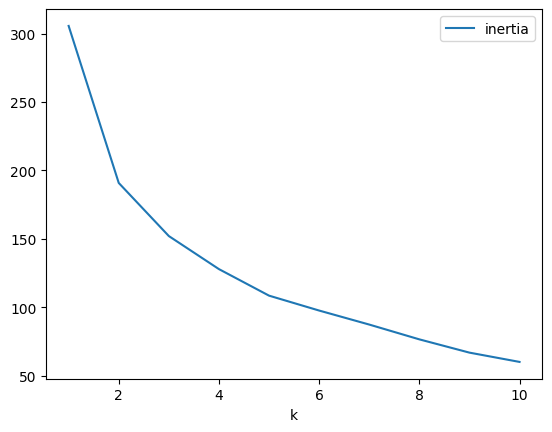

In [129]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.plot("k", "inertia")

In [130]:
#Initialize the K-Means model using the best value for k
model = KMeans(n_clusters = 2, random_state=0)
model.fit(final_df)

KMeans(n_clusters=2, random_state=0)

In [131]:
predictions_df = model.predict(final_df)
predictions_df[:5]

array([0, 0, 1, 1, 0])

In [132]:
# Add a new column to the DataFrame with the predicted clusters

final_df["k-means segments"] = predictions_df
# Display sample data
final_df.sample(5)

,Order Quantity,Discount Applied,Unit Price,Unit Cost,Recency,Total Sales,Sales Channel_In-Store,Sales Channel_Online,k-means segments
_CustomerID,,,,,,,,,
34,0.969422,-2.085395,1.871281,1.630439,-0.385400,1.802923,True,False,1
29,1.395775,0.365486,1.965159,1.976694,-1.030179,1.902640,True,False,1
3,2.088600,0.661348,0.405272,0.602899,-0.386249,0.506207,True,False,1
1,-1.175670,-0.932232,-1.225112,-1.096920,-0.754508,-1.134450,True,False,0
25,0.156685,0.420166,0.302955,0.116379,1.244585,0.210935,True,False,1


In [135]:
elbow2 = final_df.hvplot.scatter(
    x='Unit Price',
    y="Total Sales",
    by="k-means segments",
    legend='top', 
    title = "Scatter Plot by K segment",
    height=400, width=600, 
    hover_cols='_CustomerID'
)
elbow2

:NdOverlay   [k-means segments]
   :Scatter   [Unit Price]   (Total Sales,_CustomerID)

In [ ]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [136]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_data = pca.fit_transform(final_df)

# View the first five rows of the DataFrame. 
pca_data[:5]

array([[-2.30341073, -1.24390475,  0.09246701],
       [-3.62514879, -1.95406403, -1.49114314],
       [ 1.81263696,  0.39768817, -0.76722619],
       [ 0.9247702 ,  1.00048811,  0.0801356 ],
       [-0.25476202, -0.10055696,  0.40066884]])

In [137]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.6025151 , 0.16748775, 0.15105869])

In [138]:
## know the most important features
import numpy as np
loadings = pca.components_
absolute_loadings = np.abs(loadings)
most_important_features = np.argmax(absolute_loadings, axis=1)
for component, feature_idx in enumerate(most_important_features):
    feature_name = final_df.columns[feature_idx]  # Assuming you have column names
    print(f"Component {component+1}: Most important feature is {feature_name}")

Component 1: Most important feature is Total Sales
Component 2: Most important feature is Discount Applied
Component 3: Most important feature is Recency


In [139]:
# Create a new DataFrame with the PCA data.
df_pca = pd.DataFrame(pca_data, columns=["PC1", "PC2","PC3"])

# Copy the crypto names from the original data
df_pca["_CustomerID"] = df.index

# Set the coinid column as index

df_pca = df_pca.set_index("_CustomerID")

# Display sample data
df_pca.head()

,PC1,PC2,PC3
_CustomerID,,,
1,-2.303411,-1.243905,0.092467
2,-3.625149,-1.954064,-1.491143
3,1.812637,0.397688,-0.767226
4,0.924770,1.000488,0.080136
5,-0.254762,-0.100557,0.400669


In [140]:
# Create a list with the number of k-values from 1 to 11
kp = list(range(1, 11))

In [141]:
# Create an empty list to store the inertia values
inertiap = []
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(df_pca)
    inertiap.append(k_model.inertia_)

In [142]:
# Create a dictionary with the data to plot the Elbow curve

# Create a DataFrame with the data to plot the Elbow curve
elbow_datap = {"k": kp, "inertia": inertiap}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca= pd.DataFrame(elbow_datap)
df_elbow_pca.head()

,k,inertia
0,1,292.363352
1,2,167.648896
2,3,132.002503
3,4,107.739561
4,5,90.267985


<Axes: xlabel='k'>

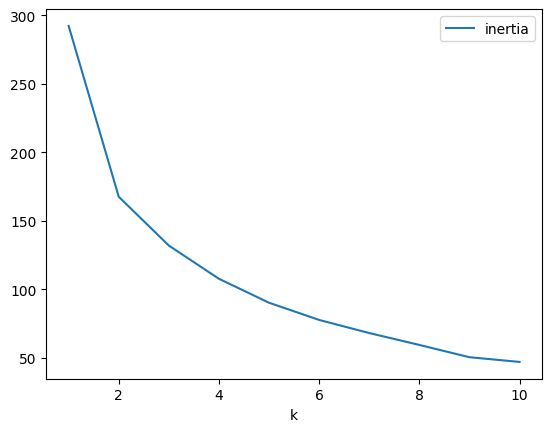

In [146]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow_pca.plot("k", "inertia")

In [147]:
# Initialize the K-Means model using the best value for k
model_pca = KMeans(n_clusters=2)

In [148]:
# Fit the K-Means model using the PCA data
model_pca.fit(df_pca)

KMeans(n_clusters=2)

In [149]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters = model_pca.predict(df_pca)
# Print the resulting array of cluster values.
print(clusters)

[1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 0]


In [150]:
# Create a copy of the DataFrame with the PCA data
df_pca_predictions = df_pca.copy()
# Add a new column to the DataFrame with the predicted clusters
df_pca_predictions["Cluster"] = clusters
# Display sample data
df_pca_predictions.head()

,PC1,PC2,PC3,Cluster
_CustomerID,,,,
1,-2.303411,-1.243905,0.092467,1
2,-3.625149,-1.954064,-1.491143,1
3,1.812637,0.397688,-0.767226,0
4,0.924770,1.000488,0.080136,0
5,-0.254762,-0.100557,0.400669,1


In [151]:
# Composite plot to contrast the Elbow curves
elbow_1 = df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k) 
elbow_2 = df_elbow_pca.hvplot.line(x="k", y="inertia",title="Elbow Curve pca", xticks=k)
(elbow_1 + elbow_2)

:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
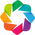

In [156]:
# Composite plot to contrast the clusters
# 
cluster_1 = final_df.hvplot.scatter(
    x="Total Sales",
    y="Unit Price",
    by="k-means segments",
    title = "Scatter Plot by K segment",
    legend='top', 
    height=400, width=600, 
    hover_cols='_CustomerID'
)
cluster_1
import holoviews as hv
hv.extension('bokeh')
from bokeh.plotting import show

show(hv.render(cluster_1))